In [2]:
#----------------This code is written for Min-Vertex Cover problem which is a NP Optimisation problem---------#
# Written by: Abhinaba Ghosh 

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#----------Define the Erdos Renyi graph------------------#
def gen_erdos_renyi_graph(num_nodes: int, edge_probab=0.5, seed=10, directed=False):
    assert edge_probab<=1.0, "Edge generation probability cannot be greater than 1"
    graph=nx.erdos_renyi_graph(n=num_nodes,p=edge_probab,seed=seed,directed=directed)

    return graph

In [26]:
G_manual = nx.Graph()
G_manual=gen_erdos_renyi_graph(20)

In [27]:
#--------------Solves the problem using classical solver--------------#
#----Dwave classical solver: dimod. ExactSolver()---------------------#
import dwave_networkx as dnx
import dimod
from collections import defaultdict
from dwave.system import DWaveSampler, EmbeddingComposite
# ExactSolver sampler for testing
sampler = dimod.ExactSolver()

# Find the minimum vertex cover using the sampler
min_vertex_cover = dnx.min_vertex_cover(G_manual, sampler, lagrange=2.0)

print(min_vertex_cover)
print(len(min_vertex_cover))   # The minimum vertex score

[0, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]
15


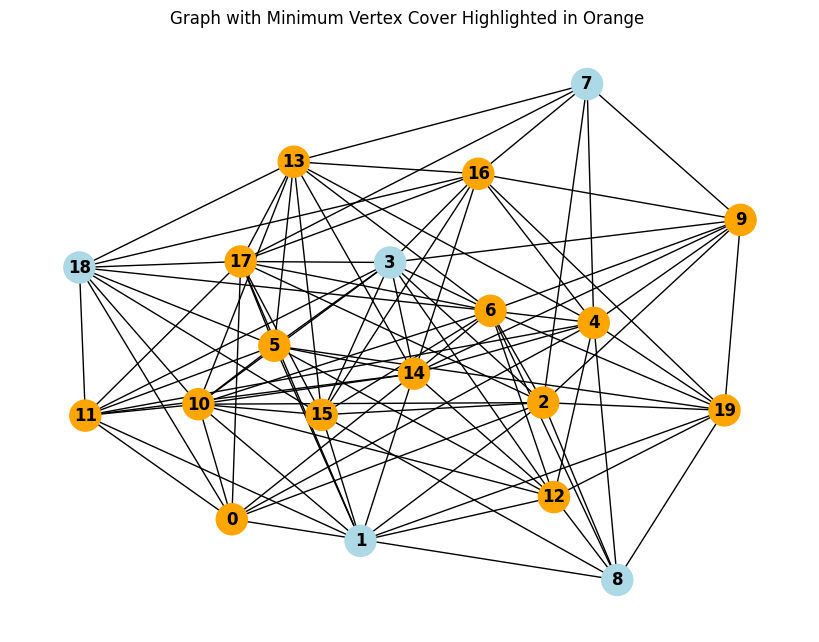

In [41]:
plt.figure(figsize=(8, 6))
nx.draw(G_manual, with_labels=True, node_color=['orange' if node in min_vertex_cover else 'lightblue' for node in G_manual.nodes()], node_size=500, font_weight='bold')
plt.title('Graph with Minimum Vertex Cover Highlighted in Orange ')
plt.show()

In [29]:
#--------This part of code solves the problem using dwave solver------#
import dwave_networkx as dnx
import dimod
from collections import defaultdict
from dwave.system import DWaveSampler, EmbeddingComposite
# Initialize an ExactSolver sampler for testing
#sampler = dimod.ExactSolver()
#sampler = EmbeddingComposite(DWaveSampler())
trials=100
min_vertex_cover_list=[]
for i in range(trials):
    sampler = EmbeddingComposite(DWaveSampler(solver={'annealing_time': 5}))  # Set the annealing time (in microseconds)

    # Find the minimum vertex cover using the sampler
    min_vertex_cover = dnx.min_vertex_cover(G_manual, sampler, lagrange=2.0)
    min_vertex_cover_list.append(len(min_vertex_cover))

#print(min_vertex_cover)
print(min(min_vertex_cover_list))

15


[16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 16, 16, 16, 17, 16, 17, 15, 16, 16, 16, 16, 16, 16, 16, 15, 16, 16, 16, 16, 15, 15, 15, 15, 15, 16, 15, 16, 16, 16, 16, 15, 15, 16, 16, 16, 16, 16, 16, 15, 15, 15, 16, 15, 16, 16, 16, 16, 16, 15, 15, 17, 16, 16, 15, 15, 16, 15, 15, 15, 16, 15, 15, 16, 16, 16, 15, 15, 15, 15, 16, 16, 16, 15, 15, 15, 16, 16, 16, 16, 16, 15, 15, 15, 16, 16, 16, 16, 16, 17, 16]


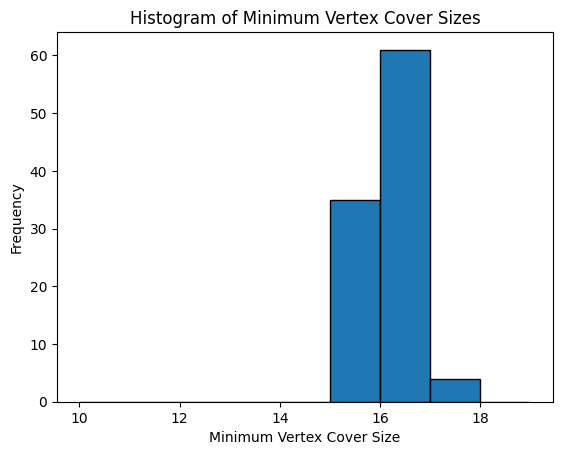

In [31]:
print((min_vertex_cover_list))
plt.hist(min_vertex_cover_list, bins=range(10,20, 1), edgecolor='black')
plt.xlabel('Minimum Vertex Cover Size')
plt.ylabel('Frequency')
plt.title('Histogram of Minimum Vertex Cover Sizes')
#plt.grid(True)
plt.show()

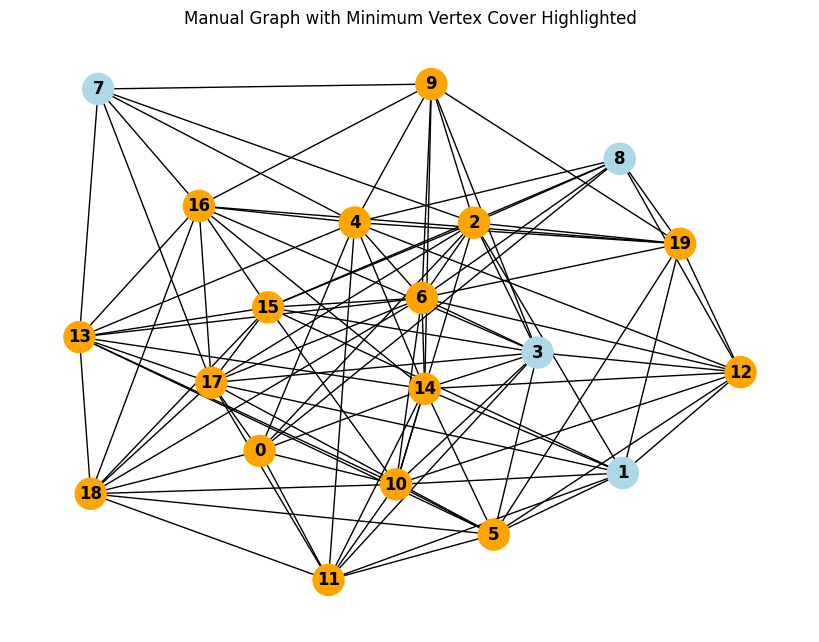

In [32]:
plt.figure(figsize=(8, 6))
nx.draw(G_manual, with_labels=True, node_color=['orange' if node in min_vertex_cover else 'lightblue' for node in G_manual.nodes()], node_size=500, font_weight='bold')
plt.title('Manual Graph with Minimum Vertex Cover Highlighted')
plt.show()

In [33]:
#-----------This part of the code implements brute force method to solve the problem---------#
import networkx as nx

def brute_force_minimum_vertex_cover(G):
    min_cover_size = float('inf')
    min_vertex_cover = []

    for subset in powerset(G.nodes()):
        if is_vertex_cover(G, subset):
            if len(subset) < min_cover_size:
                min_cover_size = len(subset)
                min_vertex_cover = subset

    return min_vertex_cover

def powerset(s):
    x = len(s)
    masks = [1 << i for i in range(x)]
    for i in range(1 << x):
        yield [ss for mask, ss in zip(masks, s) if i & mask]

def is_vertex_cover(G, subset):
    for edge in G.edges():
        if edge[0] not in subset and edge[1] not in subset:
            return False
    return True


G_manual=gen_erdos_renyi_graph(20)
# Find the minimum vertex cover using the brute-force method
min_vertex_cover = brute_force_minimum_vertex_cover(G_manual)

print(min_vertex_cover)
print(len(min_vertex_cover))


[0, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]
15


In [34]:
nodes=[4,6,8,10,12,14,16,18,20]
brute_solution=[1, 3, 4, 6, 8, 9, 12, 13, 15]
dwave_solution=[1, 3, 4, 6, 8, 9, 12, 13, 15]

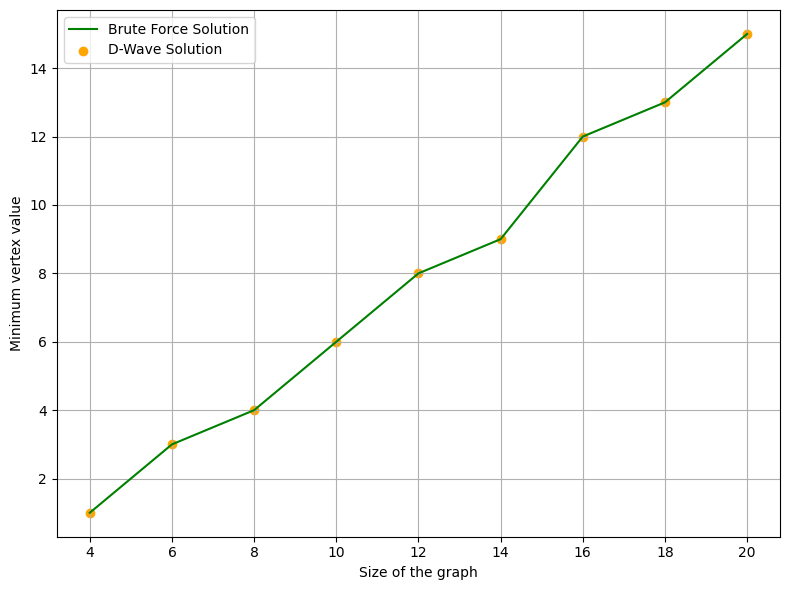

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))


plt.plot(nodes, brute_solution, color='green', label='Brute Force Solution')
plt.scatter(nodes, dwave_solution, color='orange', label='D-Wave Solution')

#plt.yticks([])  
plt.xlabel('Size of the graph')
plt.ylabel('Minimum vertex value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
